In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/new_data.zip" -d "/content/"

Archive:  /content/drive/MyDrive/new_data.zip
   creating: /content/content/dataset/
   creating: /content/content/dataset/Train/
   creating: /content/content/dataset/Train/Healthy/
  inflating: /content/content/dataset/Train/Healthy/Healthy_original_circA-P1.jpg_10ae6709-f208-48f7-9f9a-aa517e439a08.jpg  
  inflating: /content/content/dataset/Train/Healthy/Healthy_original_circA-P7.jpg_be3ff985-9a6b-4f66-af43-565acb31a271.jpg  
  inflating: /content/content/dataset/Train/Healthy/Healthy_original_circA-p27.jpg_873d249c-3cdf-450e-aea6-e1f41dfd19ce.jpg  
  inflating: /content/content/dataset/Train/Healthy/Healthy_original_circA-P35.jpg_e4496435-472d-49f9-9043-76673bd0759a.jpg  
  inflating: /content/content/dataset/Train/Healthy/Healthy_original_circA-P10.jpg_5026bd7b-aa8f-41ab-97e0-9bceced8d753.jpg  
  inflating: /content/content/dataset/Train/Healthy/Healthy_original_circA-P9.jpg_b57332c6-64af-49df-b508-9af461d2b6f5.jpg  
  inflating: /content/content/dataset/Train/Healthy/Healthy_orig

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

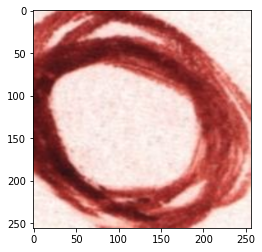

In [5]:
data_path = '/content/content/dataset/Train'
categories = ['Healthy', 'Patient']
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    plt.imshow(new_array, cmap='gray')
    # plt.show()
    break
  break

In [6]:
IMG_SIZE = 256

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass

In [7]:
import random
random.shuffle(training_set)

In [8]:
X_train = []
y_train = []

for img_array, label in training_set:
  X_train.append(img_array)
  y_train.append(label)

In [9]:
X_train =  np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [10]:
X_train = X_train/255.0

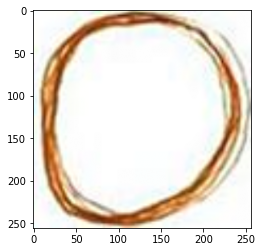

In [11]:
plt.imshow(X_train[1], cmap='gray')

In [12]:
X_train.shape

(1600, 256, 256, 3)

In [13]:
import tensorflow
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


np.random.seed(42)

SIZE=256
# img_data=[]

# img=cv2.imread('images/monalisa.jpg', 1)   #Change 1 to 0 for grey images
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
# img=cv2.resize(img,(SIZE, SIZE))
# img_data.append(img_to_array(img))

# img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
# img_array = img_array.astype('float32') / 255.


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [14]:
model.fit(X_train, X_train, validation_split=0.2, epochs=20)

Epoch 1/20
40/40 [==============================] - 16s 145ms/step - loss: 0.1874 - accuracy: 0.3758 - val_loss: 0.0275 - val_accuracy: 0.8802
Epoch 2/20
40/40 [==============================] - 5s 124ms/step - loss: 0.0217 - accuracy: 0.9035 - val_loss: 0.0161 - val_accuracy: 0.9003
Epoch 3/20
40/40 [==============================] - 5s 124ms/step - loss: 0.0128 - accuracy: 0.8880 - val_loss: 0.0103 - val_accuracy: 0.8395
Epoch 4/20
40/40 [==============================] - 5s 127ms/step - loss: 0.0097 - accuracy: 0.8728 - val_loss: 0.0086 - val_accuracy: 0.8501
Epoch 5/20
40/40 [==============================] - 5s 127ms/step - loss: 0.0082 - accuracy: 0.8818 - val_loss: 0.0076 - val_accuracy: 0.8890
Epoch 6/20
40/40 [==============================] - 5s 127ms/step - loss: 0.0083 - accuracy: 0.8584 - val_loss: 0.0075 - val_accuracy: 0.8638
Epoch 7/20
40/40 [==============================] - 5s 124ms/step - loss: 0.0070 - accuracy: 0.8738 - val_loss: 0.0065 - val_accuracy: 0.8611
Epoch

Neural network output


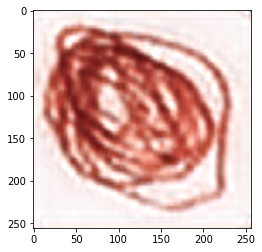

In [15]:
print("Neural network output")
pred = model.predict(X_train[0].reshape(-1, IMG_SIZE,IMG_SIZE, 3))



plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

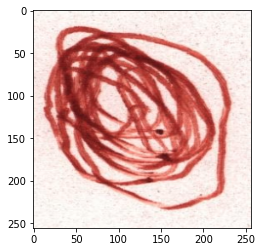

In [16]:
plt.imshow(X_train[0])

In [17]:
for layer in model.layers:
  layer.trainable = False

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [19]:
new_model = Sequential()
for layer in model.layers[:7]:
  print(layer)
  new_model.add(layer)

In [20]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)       

In [21]:
from keras.layers import Activation, Dropout, Flatten, Dense

In [22]:
new_model.add(Flatten())
new_model.add(Dense(64))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.add(Activation('sigmoid'))

In [23]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)       

In [24]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
new_model.fit(X_train, y_train,epochs=500, validation_split=0.2)

Epoch 1/500
40/40 [==============================] - 3s 43ms/step - loss: 0.6292 - accuracy: 0.7078 - val_loss: 0.5170 - val_accuracy: 0.7375
Epoch 2/500
40/40 [==============================] - 1s 33ms/step - loss: 0.5138 - accuracy: 0.7563 - val_loss: 0.5012 - val_accuracy: 0.8188
Epoch 3/500
40/40 [==============================] - 1s 33ms/step - loss: 0.4491 - accuracy: 0.8164 - val_loss: 0.4342 - val_accuracy: 0.8313
Epoch 4/500
40/40 [==============================] - 1s 33ms/step - loss: 0.4031 - accuracy: 0.8313 - val_loss: 0.4056 - val_accuracy: 0.8469
Epoch 5/500
40/40 [==============================] - 1s 35ms/step - loss: 0.3796 - accuracy: 0.8258 - val_loss: 0.3904 - val_accuracy: 0.8406
Epoch 6/500
40/40 [==============================] - 1s 34ms/step - loss: 0.3505 - accuracy: 0.8578 - val_loss: 0.3549 - val_accuracy: 0.8562
Epoch 7/500
40/40 [==============================] - 1s 33ms/step - loss: 0.3099 - accuracy: 0.8797 - val_loss: 0.3684 - val_accuracy: 0.8406
Epoch 